In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flower/four-oclock/img_160.jpg
/kaggle/input/flower/four-oclock/img_2104.jpg
/kaggle/input/flower/four-oclock/img_1306.jpg
/kaggle/input/flower/four-oclock/img_233.jpg
/kaggle/input/flower/four-oclock/img_1466.jpg
/kaggle/input/flower/four-oclock/img_1410.jpg
/kaggle/input/flower/four-oclock/img_1025.jpg
/kaggle/input/flower/four-oclock/img_359.jpg
/kaggle/input/flower/four-oclock/img_684.jpg
/kaggle/input/flower/four-oclock/img_1479.jpg
/kaggle/input/flower/four-oclock/img_801.jpg
/kaggle/input/flower/four-oclock/img_2121.jpg
/kaggle/input/flower/four-oclock/img_1689.jpg
/kaggle/input/flower/four-oclock/img_470.jpg
/kaggle/input/flower/four-oclock/img_516.jpg
/kaggle/input/flower/four-oclock/img_645.jpg
/kaggle/input/flower/four-oclock/img_1818.jpg
/kaggle/input/flower/four-oclock/img_21.jpg
/kaggle/input/flower/four-oclock/img_1721.jpg
/kaggle/input/flower/four-oclock/img_1548.jpg
/kaggle/input/flower/four-oclock/img_1151.jpg
/kaggle/input/flower/four-oclock/img_699.jpg

In [6]:
# Clean imports using tensorflow.keras
import numpy as np
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

# Optional: Enable inline plots (only works in notebooks)
%matplotlib inline


In [7]:
datagen = ImageDataGenerator(rescale=1./255)
train_path = '/kaggle/input/flower'

train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(115,115), 
                                                         classes=['Cannalily','Frangipani','Gardenia','Rangan-Creeper','arabian-jasmine','catharanthus','four-oclock','rain-lily','zinnia'], class_mode='categorical', 
                                                         batch_size=27560)

imgs, label = next(train_batches)
print(label.shape)
print(imgs.shape)

Found 20593 images belonging to 9 classes.
(20593, 9)
(20593, 115, 115, 3)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(imgs,label,test_size=0.3,random_state=42)

In [9]:
datagen = ImageDataGenerator(
        rotation_range=10,  # Rotate images randomly 
        zoom_range = 0.1, # Zoom images randomly
        width_shift_range=0.1,  # Horizontally shift images in random order
        height_shift_range=0.1  # Vertically shift images in random order
)

datagen.fit(X_train)

# ****Viewing data**# **

In [10]:
imgs, labels = next(train_batches)


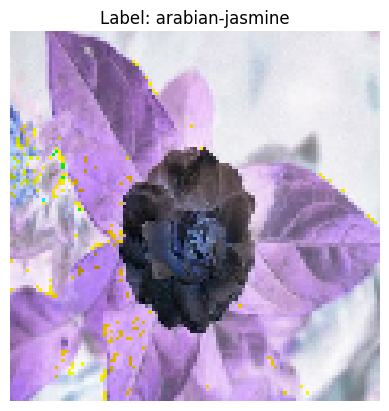

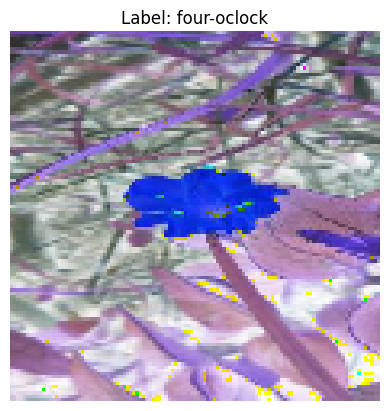

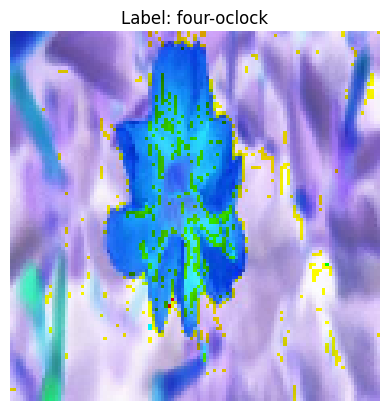

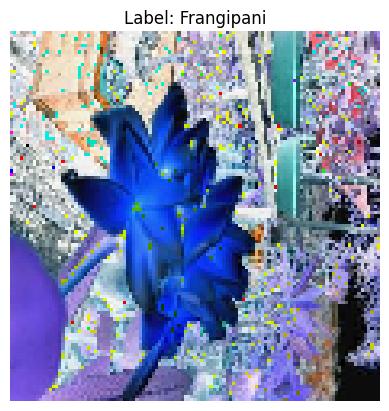

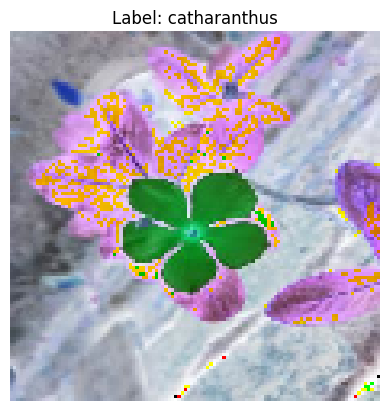

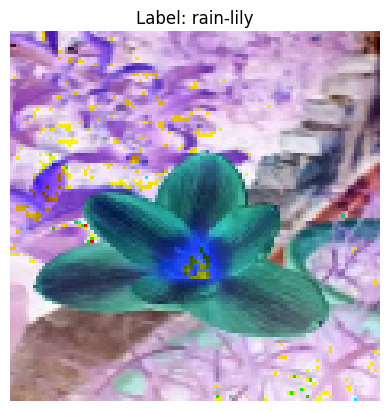

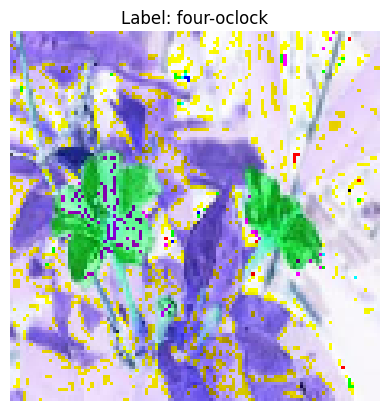

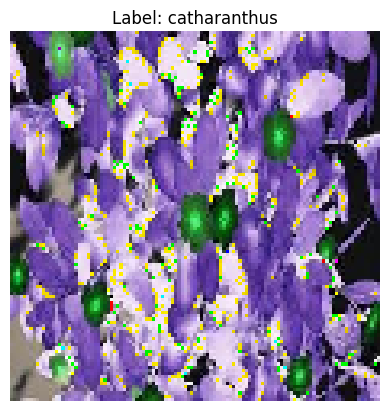

In [11]:
class_names = ['Cannalily', 'Frangipani', 'Gardenia', 'Rangan-Creeper',
               'arabian-jasmine', 'catharanthus', 'four-oclock', 'rain-lily', 'zinnia']

for i in range(8):
    image = imgs[i]
    label_vector = labels[i]  # ensure this is the one-hot vector
    class_index = np.argmax(label_vector)
    
    plt.imshow((image * 255).astype(np.uint8))
    plt.title(f"Label: {class_names[class_index]}")
    plt.axis('off')
    plt.show()


In [12]:
# Confusion Matrix
def show_confusion_matrix(history,model, x_test, y_test):
  
  # summarize history for accuracy
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'],loc='upper left')
  plt.show()

  pre_cls=model.predict_classes(x_test)   

  #Decode from one hot encoded to original for confusion matrix
  decoded_label = np.zeros(x_test.shape[0],)
  for i in range(y_test.shape[0]):
    decoded_label[i] = np.argmax(y_test[i])
  #print(decoded_label.shape)

  cm1 = confusion_matrix(decoded_label,pre_cls)
  print('Confusion Matrix : \n')
  print(cm1)

In [13]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

# Set input size
image_w, image_h = 115, 115

# Load VGG16 model without top layers
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(image_w, image_h, 3))
base_model.summary()

# Freeze all layers
for layer in base_model.layers:
    layer.trainable = False

# Show which layers are trainable
print("\nTrainable Layers:")
for i, layer in enumerate(base_model.layers):
    print(i, layer.name, layer.trainable)

# Build the new model on top of VGG16
new_model = Sequential([
    base_model,
    Flatten(name='flatten'),
    Dense(256, activation='relu', name='new_fc1'),
    Dropout(0.5),
    Dense(9, activation='softmax', name='new_predictions')  # Changed to 9 for your 9 flower classes
])

new_model.summary()


I0000 00:00:1747135672.152191      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1747135672.152932      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 115, 115, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 115, 115, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 115, 115, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 57, 57, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 57, 57, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 57, 57, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 28, 28, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 28, 28, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 7, 7, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 7, 7, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 7, 7, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 3, 3, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)


Trainable Layers:
0 input_layer False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 False
16 block5_conv2 False
17 block5_conv3 False
18 block5_pool False


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 3, 3, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ new_fc1 (Dense)                      │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ new_predictions (Dense)              │ (None, 9)                   │           2,313 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,896,905 (60.64 MB)

 Trainable params: 1,182,217 (4.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [14]:
from tensorflow.keras import optimizers  # ✅ Add this import if missing

# Compile the model
new_model.compile(
    loss="categorical_crossentropy",
    optimizer=optimizers.SGD(learning_rate=0.0001, momentum=0.9),
    metrics=["accuracy"]
)

# Train the model
print("Batch Size: 10, Epochs: 5, Optimizer: SGD")
new_model.fit(
    imgs, labels,  # Make sure to use correct variable names from earlier (labels not label)
    batch_size=10,
    epochs=5,
    verbose=1,
    validation_split=0.30,
    shuffle=True
)


Batch Size: 10, Epochs: 5, Optimizer: SGD
Epoch 1/5


I0000 00:00:1747135693.857756     134 service.cc:148] XLA service 0x7a89600056c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747135693.858599     134 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1747135693.858618     134 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1747135694.231916     134 cuda_dnn.cc:529] Loaded cuDNN version 90300


  10/1442 ━━━━━━━━━━━━━━━━━━━━ 26s 18ms/step - accuracy: 0.0737 - loss: 28.3951    

I0000 00:00:1747135697.714261     134 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1442/1442 ━━━━━━━━━━━━━━━━━━━━ 51s 32ms/step - accuracy: 0.4486 - loss: 3.9472 - val_accuracy: 0.7308 - val_loss: 0.8030
Epoch 2/5
1442/1442 ━━━━━━━━━━━━━━━━━━━━ 40s 28ms/step - accuracy: 0.6624 - loss: 0.9566 - val_accuracy: 0.7893 - val_loss: 0.6421
Epoch 3/5
1442/1442 ━━━━━━━━━━━━━━━━━━━━ 42s 29ms/step - accuracy: 0.7422 - loss: 0.7338 - val_accuracy: 0.8185 - val_loss: 0.5398
Epoch 4/5
1442/1442 ━━━━━━━━━━━━━━━━━━━━ 42s 29ms/step - accuracy: 0.7728 - loss: 0.6339 - val_accuracy: 0.8391 - val_loss: 0.4909
Epoch 5/5
1442/1442 ━━━━━━━━━━━━━━━━━━━━ 42s 29ms/step - accuracy: 0.8095 - loss: 0.5347 - val_accuracy: 0.8485 - val_loss: 0.4483


In [21]:
from tensorflow.keras import optimizers

# ✅ Compiling the model - Adam Optimizer (with corrected parameter name)
new_model.compile(
    loss="categorical_crossentropy",
    optimizer=optimizers.Adam(learning_rate=0.0001),  # fixed here
    metrics=["accuracy"]
)

# ✅ Fitting the model
print("✅ Batch Size: 10, Epoch: 10, Optimizer: Adam")
new_model.fit(
    imgs,           # numpy array of images
    label,          # numpy array of one-hot encoded labels
    batch_size=10,
    epochs=10,
    verbose=1,
    validation_split=0.30,
    shuffle=True
)


✅ Batch Size: 10, Epoch: 10, Optimizer: Adam
Epoch 1/10
1442/1442 ━━━━━━━━━━━━━━━━━━━━ 52s 34ms/step - accuracy: 0.2149 - loss: 1.8393 - val_accuracy: 0.1201 - val_loss: 2.5856
Epoch 2/10
1442/1442 ━━━━━━━━━━━━━━━━━━━━ 42s 29ms/step - accuracy: 0.2170 - loss: 1.8347 - val_accuracy: 0.1217 - val_loss: 2.6211
Epoch 3/10
1442/1442 ━━━━━━━━━━━━━━━━━━━━ 45s 31ms/step - accuracy: 0.2233 - loss: 1.8176 - val_accuracy: 0.1203 - val_loss: 2.6133
Epoch 4/10
1442/1442 ━━━━━━━━━━━━━━━━━━━━ 44s 31ms/step - accuracy: 0.2258 - loss: 1.8157 - val_accuracy: 0.1186 - val_loss: 2.6423
Epoch 5/10
1442/1442 ━━━━━━━━━━━━━━━━━━━━ 45s 31ms/step - accuracy: 0.2268 - loss: 1.8108 - val_accuracy: 0.1195 - val_loss: 2.6476
Epoch 6/10
1442/1442 ━━━━━━━━━━━━━━━━━━━━ 45s 31ms/step - accuracy: 0.2344 - loss: 1.7925 - val_accuracy: 0.1172 - val_loss: 2.6675
Epoch 7/10
1442/1442 ━━━━━━━━━━━━━━━━━━━━ 45s 31ms/step - accuracy: 0.2351 - loss: 1.7854 - val_accuracy: 0.1178 - val_loss: 2.6997
Epoch 8/10
1442/1442 ━━━━━━━━━━

**VGG-16** All layers frozen using **SGD** optimizer--- accuracy=**0.81**, validation accuracy=**0.84** and using **Adam** **Optimizer--- accuracy=0.99, validation accuracy=0.94

In [23]:
# ✅ Required import for applications like VGG16
from tensorflow.keras import applications
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

# ✅ VGG16 pre-trained model without the top layers (fully connected layers)
image_w, image_h = 115, 115
model2 = applications.VGG16(weights="imagenet", include_top=False, input_shape=(image_w, image_h, 3))

# ✅ Freeze all layers first, then unfreeze last few layers
for i, layer in enumerate(model2.layers):
    layer.trainable = False
    if i >= 15:  # Unfreeze from layer 15 onwards
        layer.trainable = True

# ✅ Show which layers are trainable
for i, layer in enumerate(model2.layers):
    print(i, layer.name, layer.trainable)

# ✅ Add custom layers on top of the base model
new_model2 = Sequential([
    model2,
    Flatten(name='flatten'),
    Dense(512, activation='relu', name='new_fc1'),
    Dropout(0.5),
    Dense(2, activation='softmax', name='new_predictions')  # Change output to match your number of classes if needed
])


0 input_layer_2 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True


In [26]:
from tensorflow.keras import applications
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras import optimizers

# Define input size
image_w, image_h = 115, 115

# Load VGG16 without top layers
model2 = applications.VGG16(weights="imagenet", include_top=False, input_shape=(image_w, image_h, 3))

# Freeze all layers except the last few
for i, layer in enumerate(model2.layers):
    layer.trainable = False
    if i >= 15:
        layer.trainable = True

# Confirm trainable layers
for i, layer in enumerate(model2.layers):
    print(i, layer.name, layer.trainable)

# Build new model
new_model2 = Sequential([
    model2,
    Flatten(name='flatten'),
    Dense(512, activation='relu', name='new_fc1'),
    Dropout(0.5),
    Dense(9, activation='softmax', name='new_predictions')  # ✅ FIXED: changed 2 → 9
])

# Compile the model
new_model2.compile(
    loss="categorical_crossentropy",
    optimizer=optimizers.SGD(learning_rate=0.00001, momentum=0.9),
    metrics=["accuracy"]
)

# Train the model
print("✅ Batch Size: 10, Epoch: 5, Optimizer: SGD")
new_model2.fit(
    imgs, label,
    batch_size=10,
    epochs=5,
    verbose=1,
    validation_split=0.30,
    shuffle=True
)


0 input_layer_4 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True
✅ Batch Size: 10, Epoch: 5, Optimizer: SGD
Epoch 1/5
1442/1442 ━━━━━━━━━━━━━━━━━━━━ 61s 40ms/step - accuracy: 0.1156 - loss: 3.2044 - val_accuracy: 0.1169 - val_loss: 2.1980
Epoch 2/5
1442/1442 ━━━━━━━━━━━━━━━━━━━━ 53s 37ms/step - accuracy: 0.1314 - loss: 2.1969 - val_accuracy: 0.1324 - val_loss: 2.1928
Epoch 3/5
1442/1442 ━━━━━━━━━━━━━━━━━━━━ 54s 38ms/step - accuracy: 0.1307 - loss: 2.1890 - val_accuracy: 0.1319 - val_loss: 2.1889
Epoch 4/5
1442/1442 ━━━━━━━━━━━━━━━━━━━━ 55s 38ms/step - accuracy: 0.1327 - loss: 2.1847 - val_accuracy: 0.1316 - val_loss: 2.1859
Epoch 5/5
1442/1442 ━━━━━━━━━━━━━

In [27]:
#Model2 unfreeze last layer
# VGG16 pre-trained model without fully connected layers and with different input dimensions
image_w, image_h = 115, 115
model2 = applications.VGG16(weights = "imagenet", include_top=False, input_shape = (image_w, image_h, 3))
#model2.summary()

# Freezing the layers except the last one
for i, layer in enumerate(model2.layers):
  layer.trainable = True
  
for i, layer in enumerate(model2.layers):
    print(i, layer.name, layer.trainable)
    
# Adding custom layers to create a new model 
new_model2 = Sequential([
    model2,
    Flatten(name='flatten'),
    Dense(512, activation='relu', name='new_fc1'),
    Dropout(0.5),
    Dense(2, activation='softmax', name='new_predictions')
])
    

0 input_layer_6 True
1 block1_conv1 True
2 block1_conv2 True
3 block1_pool True
4 block2_conv1 True
5 block2_conv2 True
6 block2_pool True
7 block3_conv1 True
8 block3_conv2 True
9 block3_conv3 True
10 block3_pool True
11 block4_conv1 True
12 block4_conv2 True
13 block4_conv3 True
14 block4_pool True
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True


In [31]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16

In [ ]:


# Load VGG16 base model
image_w, image_h = 115, 115
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(image_w, image_h, 3))

# Unfreeze last few layers for fine-tuning
for i, layer in enumerate(base_model.layers):
    layer.trainable = i >= 15  # Unfreeze last few layers

# Build the full model with correct output layer
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(9, activation='softmax')  # 9 class
])

# Compile the model
model.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(learning_rate=1e-5),
    metrics=["accuracy"]
)

# Fit the model
print("✅ Batch Size: 10, Epochs: 5, Optimizer: Adam")
model.fit(imgs, label, batch_size=10, epochs=5, validation_split=0.3, shuffle=True, verbose=1)


✅ Batch Size: 10, Epochs: 5, Optimizer: Adam
Epoch 1/5
1442/1442 ━━━━━━━━━━━━━━━━━━━━ 74s 48ms/step - accuracy: 0.1171 - loss: 4.7652 - val_accuracy: 0.1191 - val_loss: 2.1918
Epoch 2/5
1442/1442 ━━━━━━━━━━━━━━━━━━━━ 66s 46ms/step - accuracy: 0.1224 - loss: 2.1889 - val_accuracy: 0.1190 - val_loss: 2.1835
Epoch 3/5
1442/1442 ━━━━━━━━━━━━━━━━━━━━ 68s 47ms/step - accuracy: 0.1260 - loss: 2.1818 - val_accuracy: 0.1186 - val_loss: 2.1768
Epoch 4/5
1442/1442 ━━━━━━━━━━━━━━━━━━━━ 69s 48ms/step - accuracy: 0.1234 - loss: 2.1731 - val_accuracy: 0.1183 - val_loss: 2.1698
Epoch 5/5
1441/1442 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.1281 - loss: 2.1637